# Machine Learning - Housing median price in California regression

In [1]:
import os
import tarfile
import urllib

%matplotlib inline
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

## Data preparation

### Data download

In [2]:
def download_data(url=HOUSING_URL, path=HOUSING_PATH, force=False):
    if not os.path.isdir(path):
        os.makedirs(path)

    if force or not os.listdir(path):
        tgz_path = os.path.join(path, "housing.tgz")
        urllib.request.urlretrieve(url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=path)
        housing_tgz.close()
    else:
        print("Folder is already non-empty!")
import pandas as pd

def load_housing_data(path=HOUSING_PATH):
    csv_path = os.path.join(path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
download_data(force=True)

housing = load_housing_data()

### Data inspection

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

The last column of the data represents categorical parameter.

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Basic properties of numerical parameters:

In [7]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

```"housing_median_age"```, ```"median_house_value"``` and ```"median_income"``` appear to be capped.

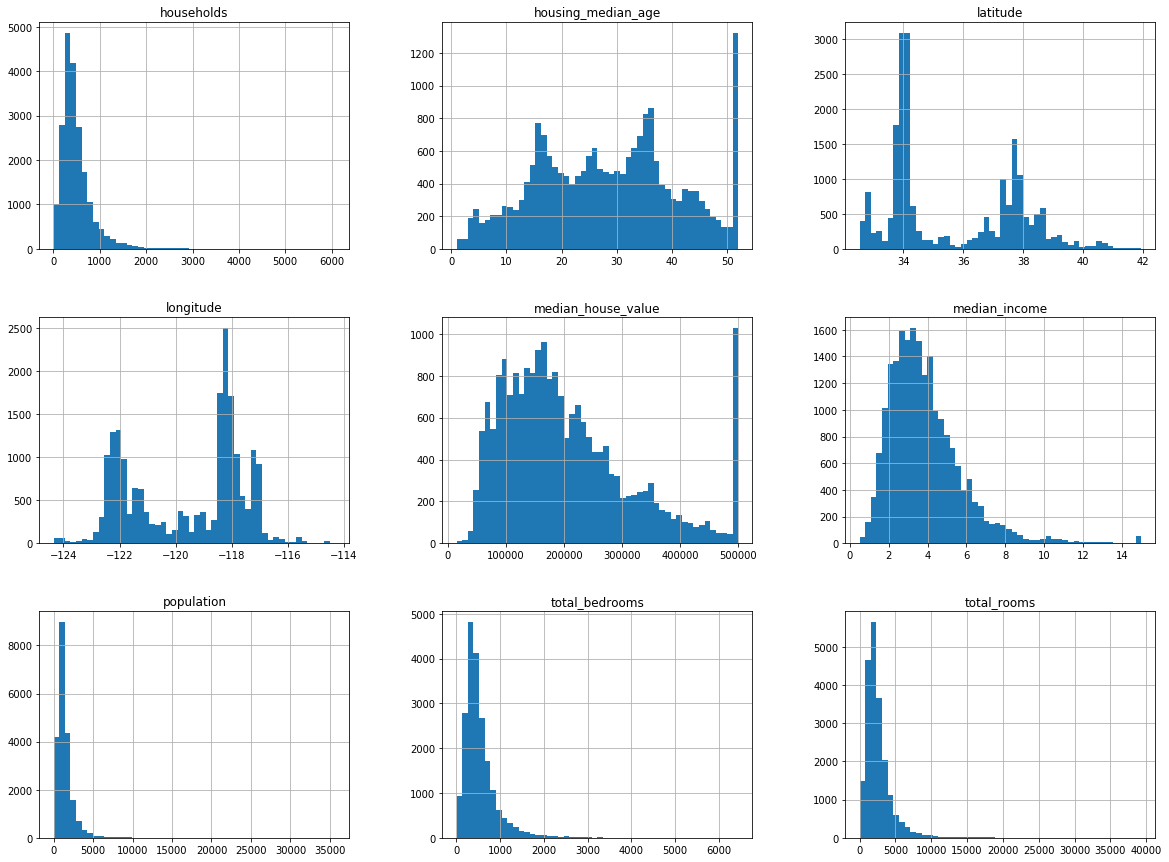

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Data manipulation

Splitting the data to the train and test sets.

The data is splitted into the test and train sets by the use of ```sklearn.model_selection.StratifiedShuffleSplit```.
The shuffle is done according to the ```housing["median_income"]``` label.

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, np.ceil(housing["median_income"]/1.5)):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [10]:
print(len(strat_test_set)/(len(strat_train_set)+len(strat_test_set)))


0.2


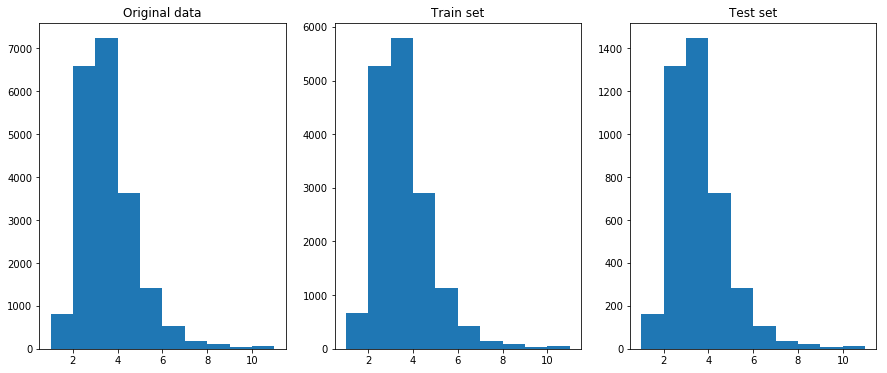

In [11]:
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
plt.hist(np.ceil(housing["median_income"]/1.5))
plt.title("Original data")
plt.subplot(1,3,2)
plt.hist(np.ceil(strat_train_set["median_income"]/1.5))
plt.title("Train set")
plt.subplot(1,3,3)
plt.hist(np.ceil(strat_test_set["median_income"]/1.5))
plt.title("Test set")
plt.show()

Save test and train data if not saved yet

In [12]:
import pickle
import os.path
def save_sets(obj, fname, force=False):
    if not os.path.isfile(fname) or force:
        pickle.dump(obj, open( fname, "wb" ))

save_sets(strat_test_set, "test_set.pkl")
save_sets(strat_train_set, "train_set.pkl")

## Train data close inspection

In [13]:
housing=strat_train_set.copy()

In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16356 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


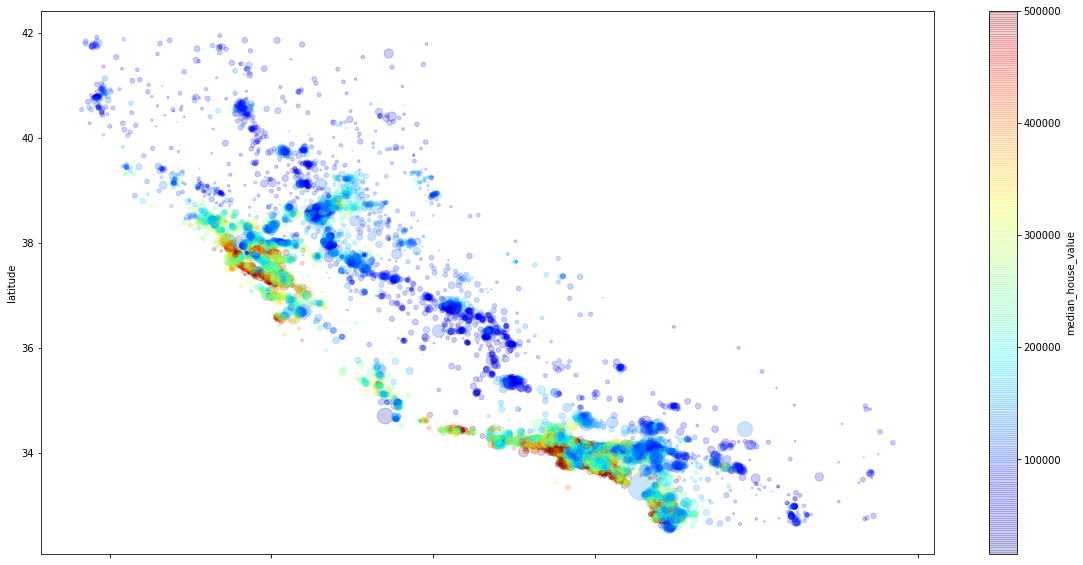

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, s=housing["population"]/50, figsize=(20,10), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

In [16]:
corr_matrix=housing.corr()

In [17]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687474
total_rooms           0.135989
housing_median_age    0.111770
households            0.065841
total_bedrooms        0.049177
population           -0.024765
longitude            -0.045056
latitude             -0.144684
Name: median_house_value, dtype: float64

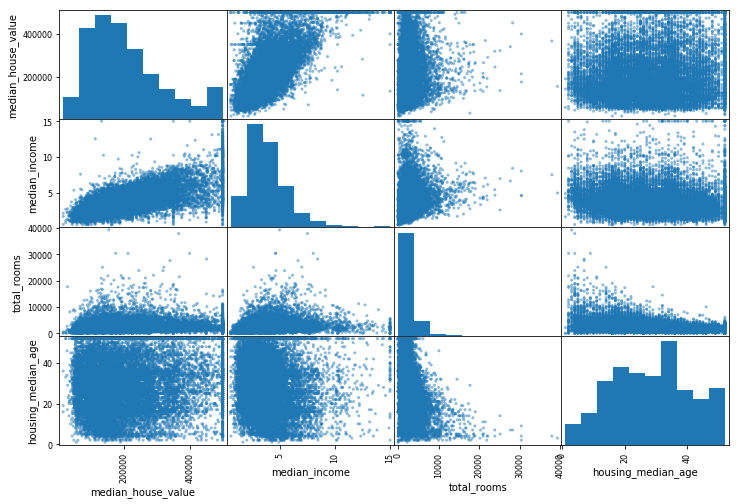

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], figsize=(12,8))
plt.show()

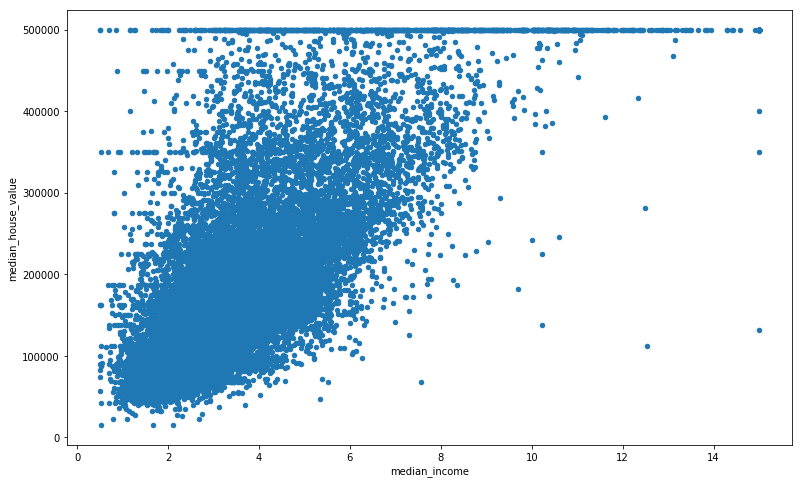

In [19]:
plt.figure(figsize=(13,8))
a=plt.axes()
housing.plot(kind="scatter", y="median_house_value", x="median_income", ax=a)
plt.show()

In [20]:
housing_labels=housing["median_house_value"]
housing.drop(columns="median_house_value",inplace=True)

In [21]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
15698    -122.46     37.79                52.0        899.0            96.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
15698       304.0       110.0        14.2959        NEAR BAY  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN

### Design of the preparation pipelines

To the data the new parameters can be added - ```rooms_per_household```, ```population_per_household```, ```bedrooms_per_room```. The ```bedrooms_per_room``` parameter is optional.

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household=X[:,population_ix]/X[:,household_ix]
        population_per_household=X[:,bedrooms_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

Data has to be spliced into the numeric data and categorical, for the latter the label binarization will be used.

In [23]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

The Label Binarizer has to be redefined because of the error https://github.com/scikit-learn/scikit-learn/issues/3112

In [24]:
from sklearn.preprocessing import LabelBinarizer
class MyLabelBinarizer(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.encoder = LabelBinarizer()
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

The ultimate preprocessing pipeline:
1. Splice data into numerical and categorical
2. For numerical data:
    * The missing values are filled by the ```Imputer(strategy="median")```,
    * attributes are added by the use of ```CombinedAttributesAdder()```,
    * the attributes are scaled by the ```StandardScaler()```.
3. For the categorical attributes
    * Label binarization done by the ```MyLabelBinarizer()```.

In [25]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

num_attribs=list(housing.columns)[:-1]
cat_attribs=["ocean_proximity"]
num_pipeline=Pipeline([('selector',DataFrameSelector(num_attribs)),('imputer', Imputer(strategy="median")),('attr_adder', CombinedAttributesAdder()), ('std', StandardScaler())])
cat_pipeline=Pipeline([('selector', DataFrameSelector(cat_attribs)),('label_binarizer', MyLabelBinarizer())])
transform_pipeline=FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), ("cat_pipeline", cat_pipeline)])

In [26]:
housing_prepared=transform_pipeline.fit_transform(housing)

In [27]:
pd.DataFrame(housing_prepared).describe()

0             1             2             3             4   \
count  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04   
mean   2.614645e-15  7.548535e-16 -1.038682e-16 -7.763392e-17 -6.688435e-17   
std    1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00   
min   -2.386630e+00 -1.447931e+00 -2.196255e+00 -1.216555e+00 -1.297388e+00   
25%   -1.112932e+00 -7.977572e-01 -8.451399e-01 -5.494632e-01 -5.803059e-01   
50%    5.303876e-01 -6.433993e-01  2.911089e-02 -2.349373e-01 -2.448571e-01   
75%    7.801323e-01  9.750200e-01  6.649296e-01  2.400988e-01  2.607468e-01   
max    2.628243e+00  2.953608e+00  1.857090e+00  1.702131e+01  1.379537e+01   

                 5             6             7             8             9   \
count  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04   
mean   7.520161e-17 -9.919862e-17  6.584217e-18  1.891302e-17  1.220753e-16   
std    1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00   
min   -1.267340e+00 -1.320642e+00 -1.776427e+00 -2.075315e-01 -1.889536e+00   
25%   -5.689017e-01 -5.814724e-01 -6.880439e-01 -5.740088e-02 -1.858172e-01   
50%   -2.286140e-01 -2.384762e-01 -1.750853e-01 -2.397687e-02 -1.021094e-01   
75%    2.661875e-01  2.773476e-01  4.586980e-01  1.597391e-02 -3.243542e-03   
max    3.059913e+01  1.292301e+01  5.859146e+00  1.070608e+02  6.351055e+01   

                 10            11            12            13            14  \
count  1.651200e+04  16512.000000  16512.000000  16512.000000  16512.000000   
mean   1.086732e-16      0.440044      0.318435      0.000121      0.112888   
std    1.000030e+00      0.496407      0.465883      0.011005      0.316465   
min   -2.843975e+00      0.000000      0.000000      0.000000      0.000000   
25%   -6.204124e-01      0.000000      0.000000      0.000000      0.000000   
50%   -1.690745e-01      0.000000      0.000000      0.000000      0.000000   
75%    4.286658e-01      1.000000      1.000000      0.000000      0.000000   
max    2.594721e+01      1.000000      1.000000      1.000000      1.000000   

                 15  
count  16512.000000  
mean       0.128513  
std        0.334670  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

Possible hyperparameters to tune:

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

fit_pipeline=Pipeline([('reg',LinearRegression())])
prepare_fit_pipeline=Pipeline([('prepare',transform_pipeline),('fit', fit_pipeline)])

In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(prepare_fit_pipeline, housing, housing_labels.values, scoring='neg_mean_squared_error', cv=10)

array([-4.44858816e+09, -4.38231535e+09, -4.54966764e+09, -5.56150240e+09,
       -5.11968988e+09, -4.88298819e+09, -4.28696188e+09, -4.58247058e+09,
       -4.91804911e+09, -4.55177956e+09])

In [30]:
param_grid=[
    {'fit__reg': [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()],
    'prepare__num_pipeline__attr_adder__add_bedrooms_per_room': [False, True]}
]
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(prepare_fit_pipeline, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(housing,housing_labels.values)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('prepare', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('impu...    steps=[('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'fit__reg': [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
       ...e=0, warm_start=False)], 'prepare__num_pipeline__attr_adder__add_bedrooms_per_room': [False, True]}],
       pre_dispatch='2*n_jobs', refit=True, return_tra

In [31]:
grid_search.best_params_

{'fit__reg': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 'prepare__num_pipeline__attr_adder__add_bedrooms_per_room': True}

In [56]:
grid_search.best_estimator_.get_params()[list(param_grid[0].keys())[0]]

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
grid_search.best_estimator_.get_params()[list(param_grid[0].keys())[1]]

True

In [58]:
best_pipe_01=grid_search.best_estimator_

In [59]:
from sklearn.externals import joblib
def save_estimator(obj, fname, force=False):
    if not os.path.isfile(fname) or force:
        joblib.dump(obj, open( fname, "wb" ))
save_estimator(best_pipe_01, "best_estimator_01")

In [61]:
best_pipe_01.get_params()

{'fit': Pipeline(memory=None,
      steps=[('reg', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False))]),
 'fit__memory': None,
 'fit__reg': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 'fit__reg__bootstrap': True,
 'fit__reg__criterion': 'mse',
 'fit__reg__max_depth': None,
 'fit__reg__max_features': 'auto',
 'fit__

In [69]:
param_grid2=[
    {'fit__reg__n_estimators': [110,120,130], 'fit__reg__max_features': [6]}
]
grid_search=GridSearchCV(best_pipe_01, param_grid2, cv=8, scoring="neg_mean_squared_error")
grid_search.fit(housing, housing_labels.values)
print(grid_search.best_estimator_.get_params()[list(param_grid2[0].keys())[0]])
print(grid_search.best_estimator_.get_params()[list(param_grid2[0].keys())[1]])

110
6


In [70]:
grid_search.cv_results_['mean_test_score']

array([-2.38783836e+09, -2.39056109e+09, -2.39066977e+09])

In [ ]:
joblib.dump(grid_search.best_estimator_, "best_forest_reg.pkl")

In [ ]:
cross_val_score(grid_search.best_estimator_, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [ ]:
best_forest_scores=np.array([ -2.33277331e+09,  -2.17503353e+09,  -2.38533817e+09,
        -2.53853313e+09,  -2.33182959e+09,  -2.69598293e+09,
        -2.28818586e+09,  -2.16920384e+09,  -2.68332218e+09,
        -2.40637236e+09])
np.mean(np.sqrt(-best_forest_scores))

In [ ]:
grid_search.cv_results_

In [ ]:
full_pipeline.get_params()['num_pipeline__attr_adder__add_bedrooms_per_room']

In [ ]:
full_with_forest=Pipeline([('preparations', full_pipeline), ('predictor', RandomForestRegressor())])

In [ ]:
full_with_forest.get_params()

In [ ]:

grid_search=GridSearchCV(full_with_forest, {'preparations__num_pipeline__attr_adder__add_bedrooms_per_room': [True, False]}, cv=5, scoring="neg_mean_squared_error")


In [ ]:
grid_search.fit(housing, housing_labels)

In [ ]:
grid_search.cv_results_